## Importa bibliotecas

In [1]:
import os
import urllib.request
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random.seed = 0
np.random.seed = 0

# Classificação Binária

## Download dataset

In [3]:
data_url = 'http://www.dca.fee.unicamp.br/~lboccato/two_moons.csv'
data_dir = os.path.abspath(os.path.relpath('../data'))
data_path = os.path.join(data_dir, 'two_moons.csv')
image_dir = os.path.abspath(os.path.relpath('../doc/images'))

urllib.request.urlretrieve(data_url, data_path)

('/home/rafael/inbox/machine-learning/2-linear-classification/data/two_moons.csv',
 <http.client.HTTPMessage at 0x7f8bded4c6d8>)

In [4]:
%%bash
head "../data/two_moons.csv"

,x_1,x_2,y
0,2.0644296514467197,0.546069086070731,1.0
1,1.762473261484448,-0.06268920285178106,1.0
2,-0.24548972654900278,1.068868024796405,0.0
3,-0.17463045222800389,0.18388168037297553,1.0
4,0.4521100769674068,-0.40651213749666293,1.0
5,1.9396117132053508,0.43090598314745787,1.0
6,0.898613370647941,0.8226576504874641,0.0
7,0.052218958530233006,1.3636857785600163,0.0
8,-0.6284662881051902,1.1413048711192604,0.0


## Importa dataset

In [5]:
dataset = np.loadtxt(data_path, skiprows=1, usecols=(1,2,3), delimiter=',')

In [6]:
dataset.shape

(1000, 3)

In [7]:
X = dataset[:,0:2]
y = dataset[:,2].astype(int)

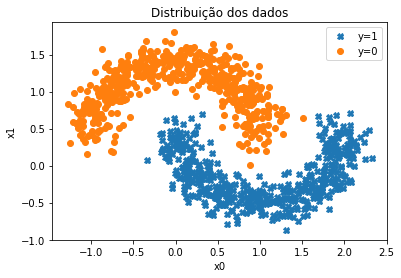

In [8]:
mask1 = [i for i, e in enumerate(y) if e]
mask2 = [i for i, e in enumerate(y) if not e]
plt.plot(X[mask1, 0], X[mask1,1], 'X')
plt.plot(X[mask2, 0], X[mask2, 1], 'o')
plt.xlabel('x0'), plt.ylabel('x1')
plt.title("Distribuição dos dados")
plt.legend(['y=1', 'y=0'])
plt.savefig(os.path.join(image_dir, 'data.png'), bbox_inches='tight')
plt.show()

## Discriminante linear de Fischer

In [9]:
Phi = np.column_stack((np.ones(X.shape[0]), X))

In [10]:
model = lambda W, Phi: np.dot(Phi, W)

In [11]:
mmq = lambda Phi, y: np.dot(np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T), y)

In [12]:
w = mmq(Phi, y)
print(w)

[ 0.6969025   0.10974418 -0.5623046 ]


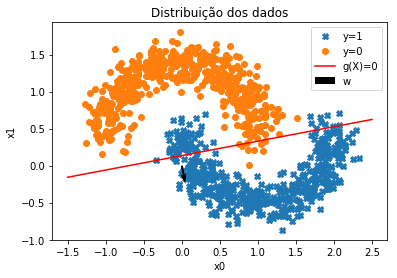

In [23]:
mask1 = [i for i, e in enumerate(y) if e]
mask2 = [i for i, e in enumerate(y) if not e]
plt.plot(X[mask1, 0], X[mask1,1], 'X', zorder=1)
plt.plot(X[mask2, 0], X[mask2, 1], 'o', zorder=2)

x = np.linspace(-1.5, 2.5, 1000)
w_norm = np.linalg.norm(w[1:])
gx = -(w[1]/w[2])*x - (w[1]/w[2])*w[0]
plt.plot(x, gx, 'r')

origin = [0], [0] # origin point
plt.xlabel('x0'), plt.ylabel('x1')

plt.title("Distribuição dos dados")
plt.quiver(*origin, w[1], w[2], width=0.006, color='black', zorder=3)
plt.legend(['y=1', 'y=0', 'g(X)=0', 'w'])
plt.savefig(os.path.join(image_dir, 'fischer.png'), bbox_inches='tight')
plt.show()

### Projeção em w

In [27]:
proj = lambda X, W: np.dot(X, W[1:])

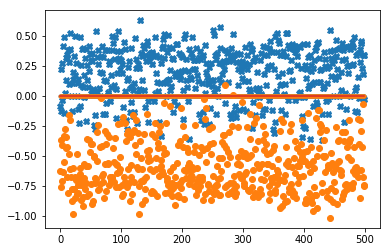

In [44]:
out = proj(X, w)
plt.stem(out[mask1], linefmt='C0.', markerfmt='C0X')
plt.stem(out[mask2], linefmt='C1.', markerfmt='C1o')
plt.savefig(os.path.join(image_dir, 'stem_proj.png'), bbox_inches='tight')
plt.show()

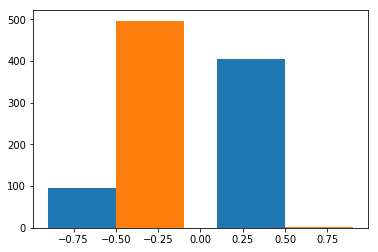

In [55]:
plt.hist([out[mask1], out[mask2]], bins=[-1,0,1], color=['C0', 'C1'])
plt.show()

In [57]:
def fischer(X, W, thres):
    out = proj(X, W)
    return np.arra[1 if e>thres else 0 for e in out]